# DECISION TREES

### IMPORTS

In [6]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as cv
import sklearn  
import warnings
from statsmodels.stats.proportion import proportion_confint
warnings.filterwarnings("ignore")

### CARGAR LOS DATOS

In [7]:
X = pandas.read_csv('X.csv', sep=',', na_values="")
y = pandas.read_csv('y.csv', sep=',', na_values="")
print(X.shape)
print(y.shape)

(7375, 1477)
(7375, 1)


### DIVISIÓN DE LOS DATOS

In [8]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=10)

### ARBOL DE DECISIÓN

### EVALUACIÓN DEL MODELO

Accuracy on test set: 0.683687302304564
              precision    recall  f1-score   support

       mucho       0.68      0.62      0.65      1040
        poco       0.69      0.74      0.71      1173

    accuracy                           0.68      2213
   macro avg       0.68      0.68      0.68      2213
weighted avg       0.68      0.68      0.68      2213



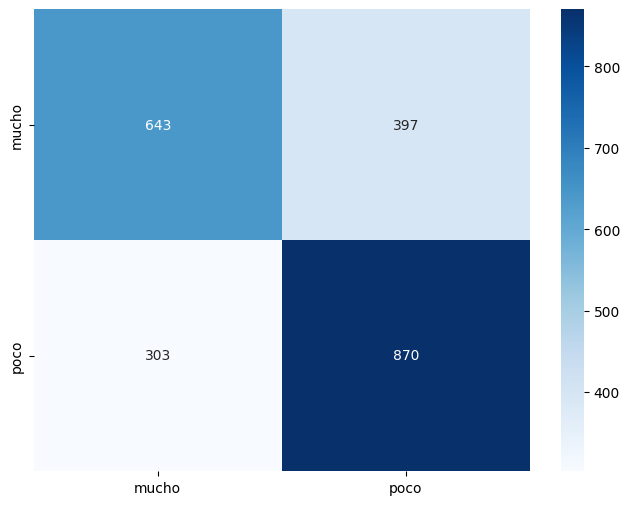

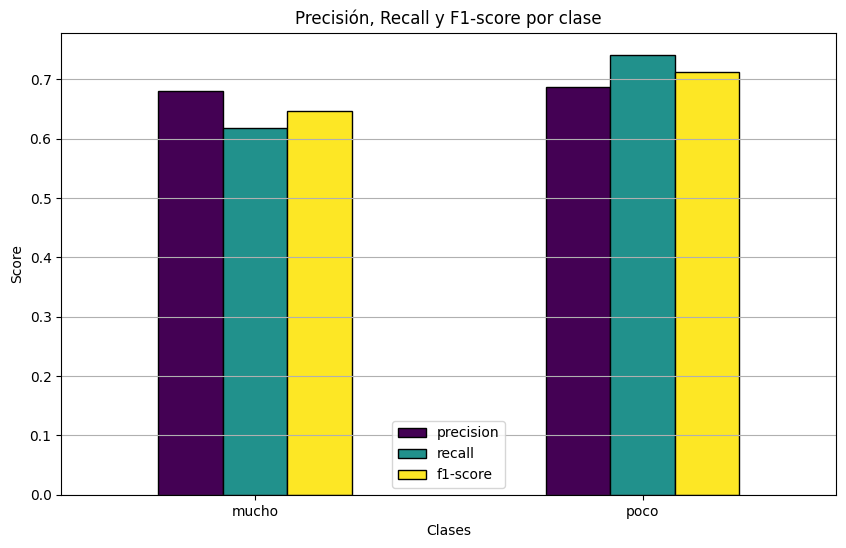

Confidence interval:  (0.6638274901756017, 0.7029197661610561)


In [22]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.001)
pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy on test set:", sklearn.metrics.accuracy_score(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print(sklearn.metrics.classification_report(y_test, pred))
conf_matrix = sklearn.metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.show()

# Reporte de clasificación
report = sklearn.metrics.classification_report(y_test, pred, output_dict=True)
# Visualización de métricas globales del reporte
metrics = ['precision', 'recall', 'f1-score']
report_df = pandas.DataFrame(report).T
report_df = report_df[metrics]
# Plot de métricas
report_df.iloc[:-3].plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title("Precisión, Recall y F1-score por clase")
plt.ylabel("Score")
plt.xlabel("Clases")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print("Confidence interval: ",proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

## Print tree
fig = plt.gcf()
fig.set_size_inches(200, 100)

tree.plot_tree(clf, filled=True,rounded=True,feature_names=list(X.columns.values))
fig.savefig('tree.png')
plt.show()
